In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold

**Load the cleaned data**

In [2]:
current_dir = os.getcwd() 
relative_path_train = os.path.join('..', 'data', 'cleaned_train_data.csv')
relative_path_test = os.path.join('..', 'data', 'cleaned_test_data.csv')

cleaned_train_data = pd.read_csv(os.path.join(current_dir, relative_path_train))
cleaned_test_data = pd.read_csv(os.path.join(current_dir, relative_path_test))

In [3]:
cleaned_train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
cleaned_train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
cleaned_test_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25889,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25890,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25891,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [6]:
cleaned_test_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,39.621983,1193.753254,2.723709,3.046422,2.755996,2.976442,3.214923,3.261615,3.448886,3.356969,3.385587,3.349786,3.632681,3.313907,3.648824,3.285521,14.225080,14.740857
std,15.134224,998.626779,1.334711,1.532971,1.412552,1.281661,1.331895,1.355505,1.320254,1.338643,1.282033,1.319045,1.176220,1.269138,1.180650,1.319355,37.185919,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


**Univariate Analysis**

Histogram for numerical vaiables and Pie charts for categorical variables

In [7]:
# Define custom colors for the pie charts
# colors kteer 34an i am just a girrrrrrll
#colors = [ '#b9eee1', '#79d3be', '#39b89a','#ff5883', '#ff91ad', '#fec9d7']
#colors = ['#a8e8f9', '#00537a', '#013c58', '#f5a201', '#ffba42', '#ffd35b']
#colors = ['#9f8be8', '#af99ff', '#caadff', '#ffc2e2', '#ffadc7', '#ff99b6']
#colors = ['#535878', '#9db0ce', '#b8d8e3', '#fee1dd', '#e9c2c5', '#cea0aa']
colors = ['#5a77d8', '#81b1fb', '#c3dbfd', '#ff5db6', '#fe86c8', '#ffc0db']

# Pie charts for each colors = ['#5a77d8', '#81b1fb', '#c3dbfd', '#ff5db6', '#fe86c8', '#ffc0db']variable
categorical_variables = [
    'satisfaction', 'Gender', 'Customer Type', 'Type of Travel',
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Class', 'Gate location', 'Food and drink',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness','Online boarding'
]

continuous_variables = ['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']


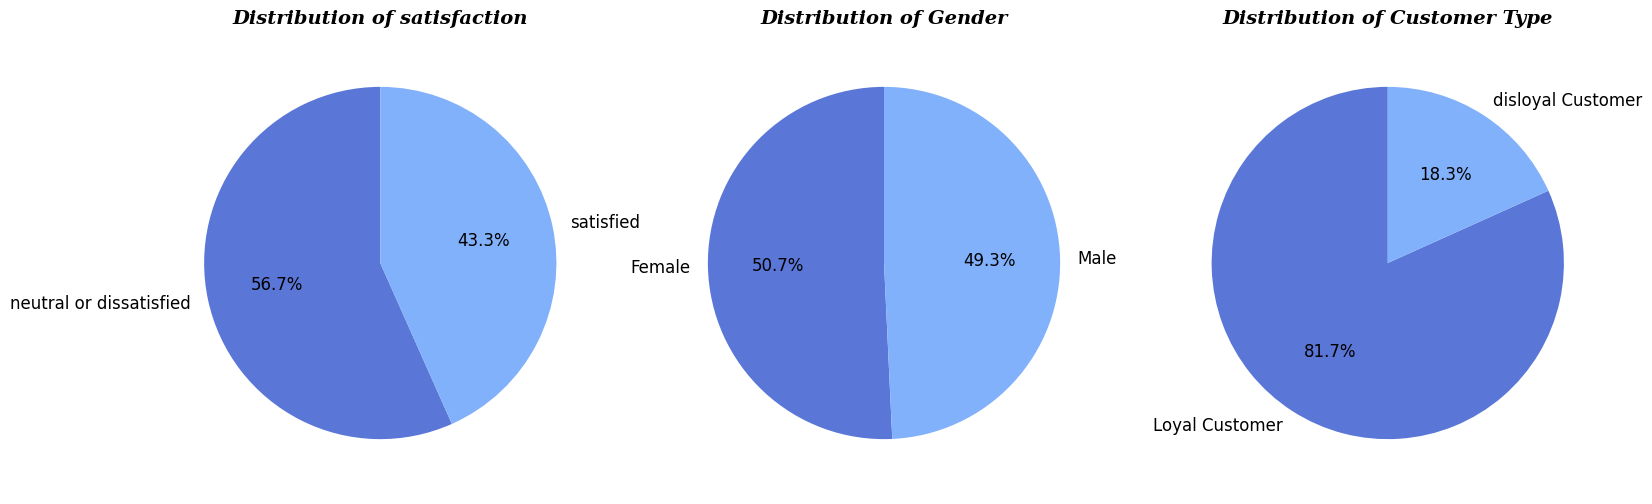

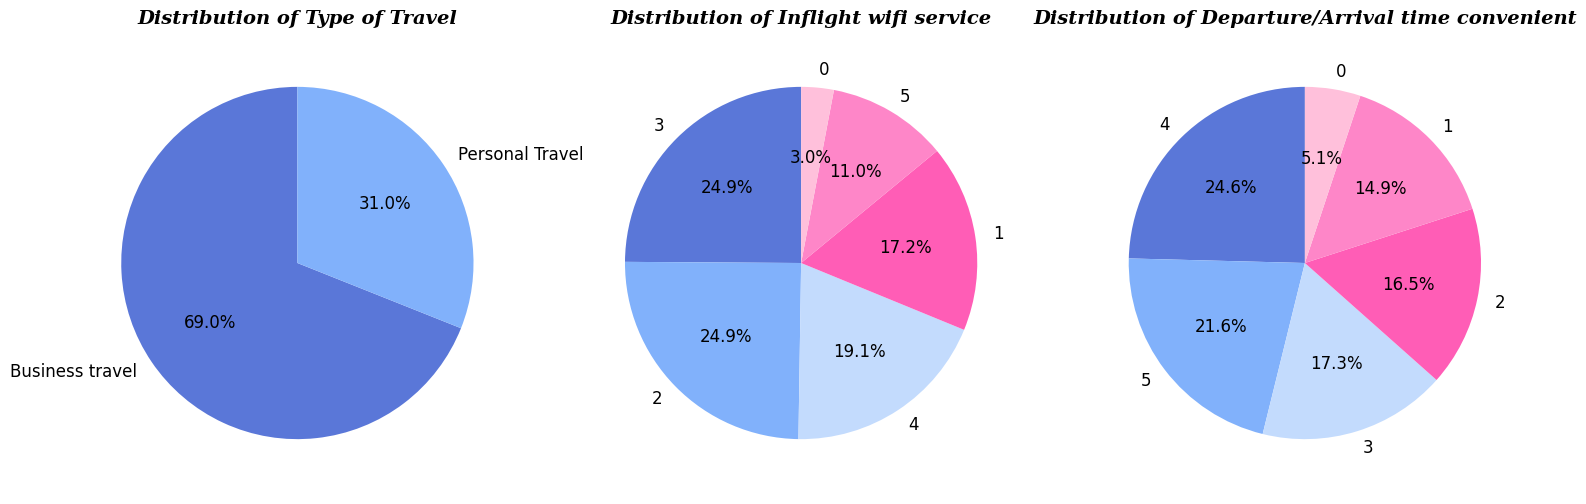

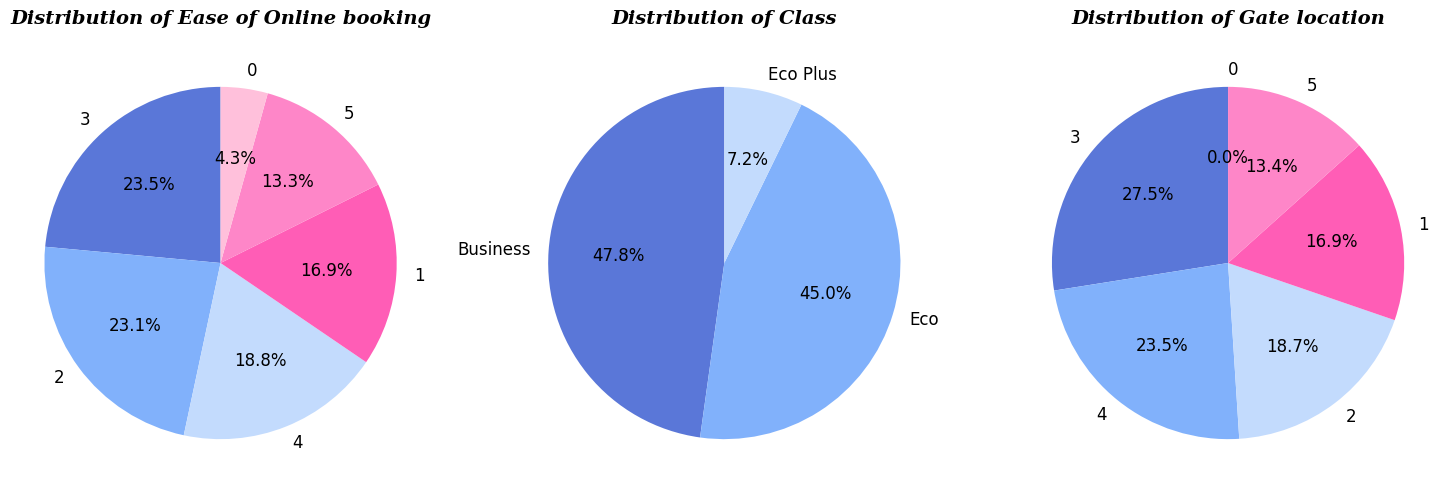

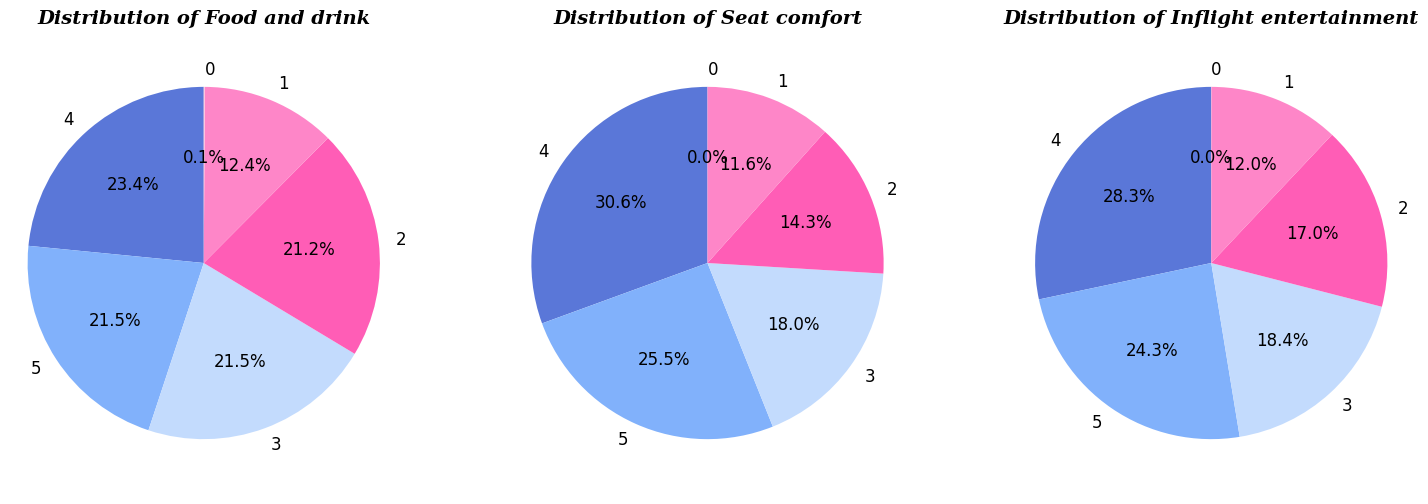

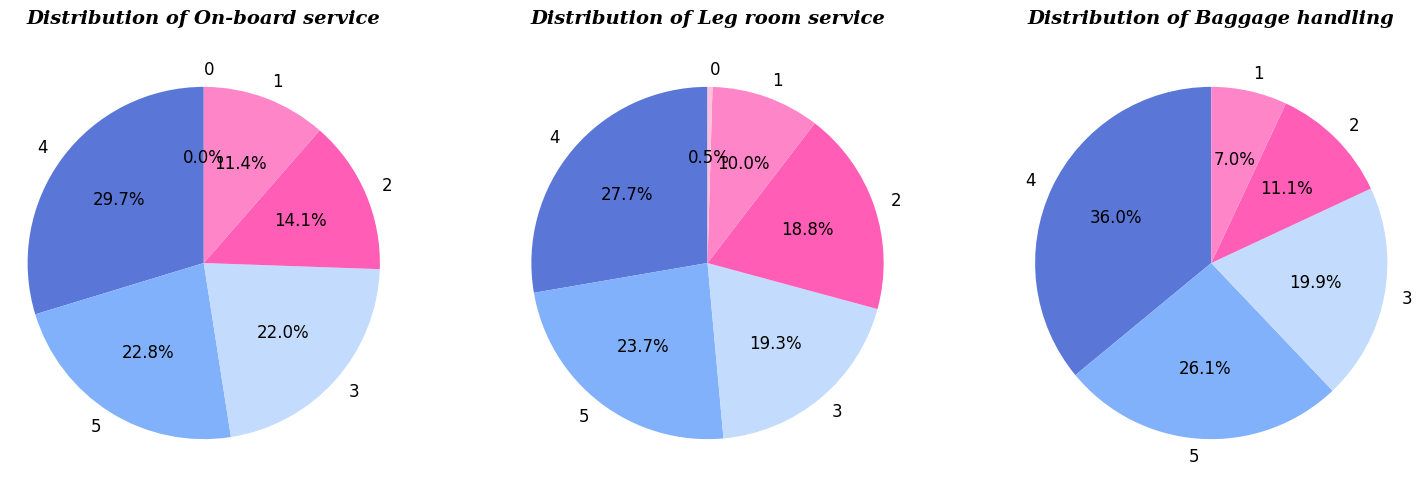

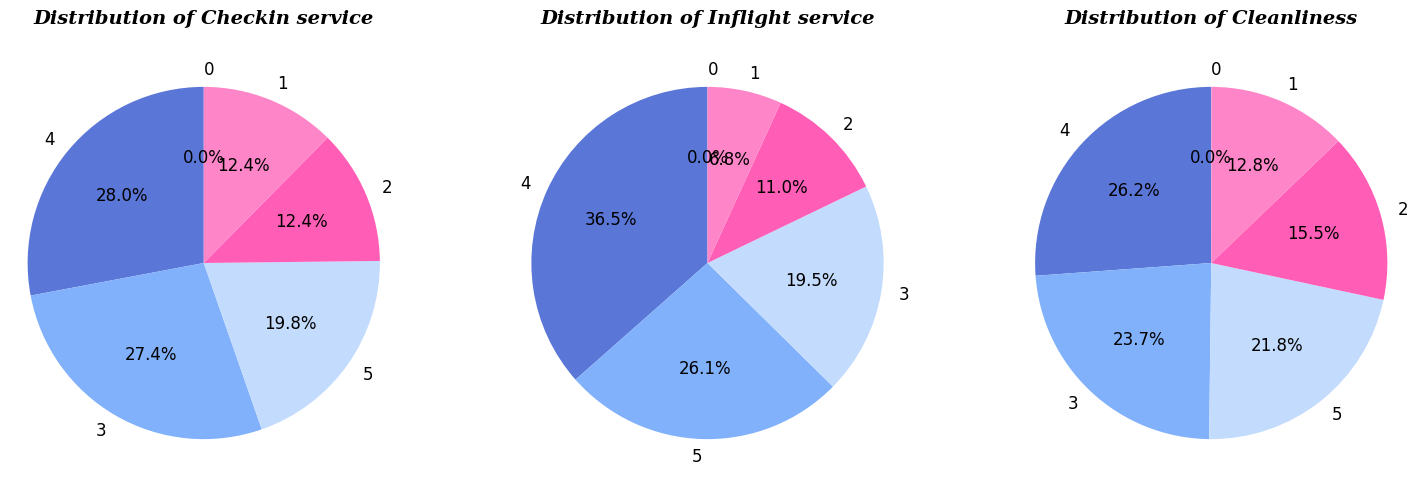

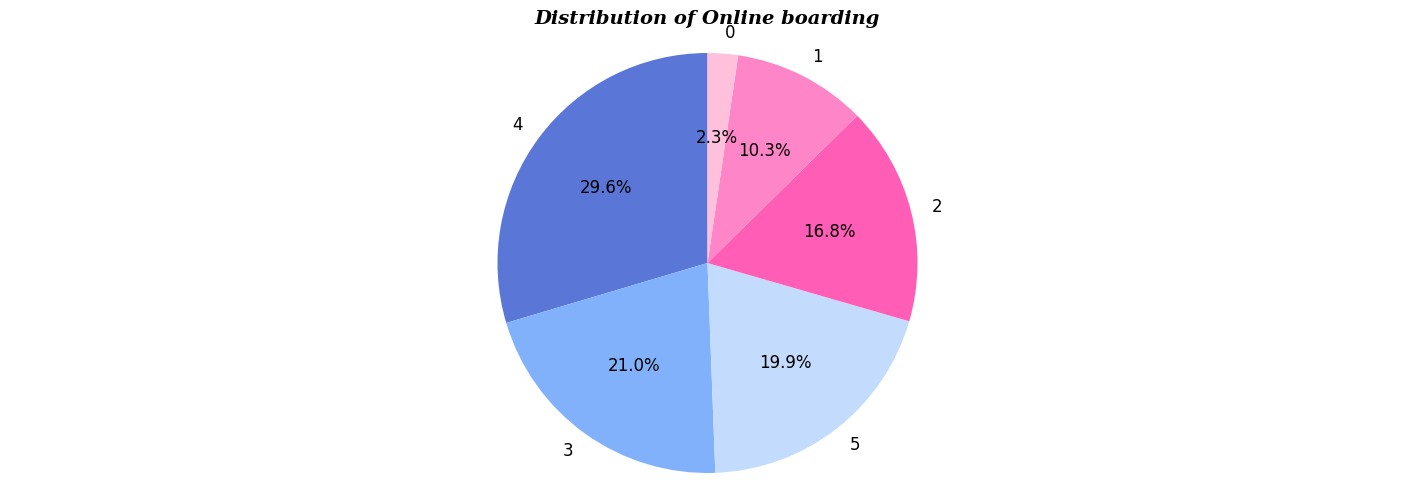

In [8]:
# Create subplots for each group of 3 variables
for i in range(0, len(categorical_variables), 3):
    num_vars = min(3, len(categorical_variables[i:]))  # Adjust the number of variables in the last group
    fig, axs = plt.subplots(1, num_vars, figsize=(18, 6))  # Set a fixed figure size
    
    # If there is only one variable in the last group, convert axs to a list to make it subscriptable
    if num_vars == 1:
        axs = [axs]
    
    for j, var in enumerate(categorical_variables[i:i+num_vars]):
        counts = cleaned_train_data[var].value_counts()
        axs[j].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12, 'color': 'black'})
        axs[j].set_title(f'Distribution of {var}', color='black', fontsize=14,fontweight='bold', fontstyle='italic', fontfamily='serif')
        axs[j].axis('equal')  
    
    plt.subplots_adjust(wspace=0.3)
    plt.show()

**Visualizing continuous variables in Training Data**

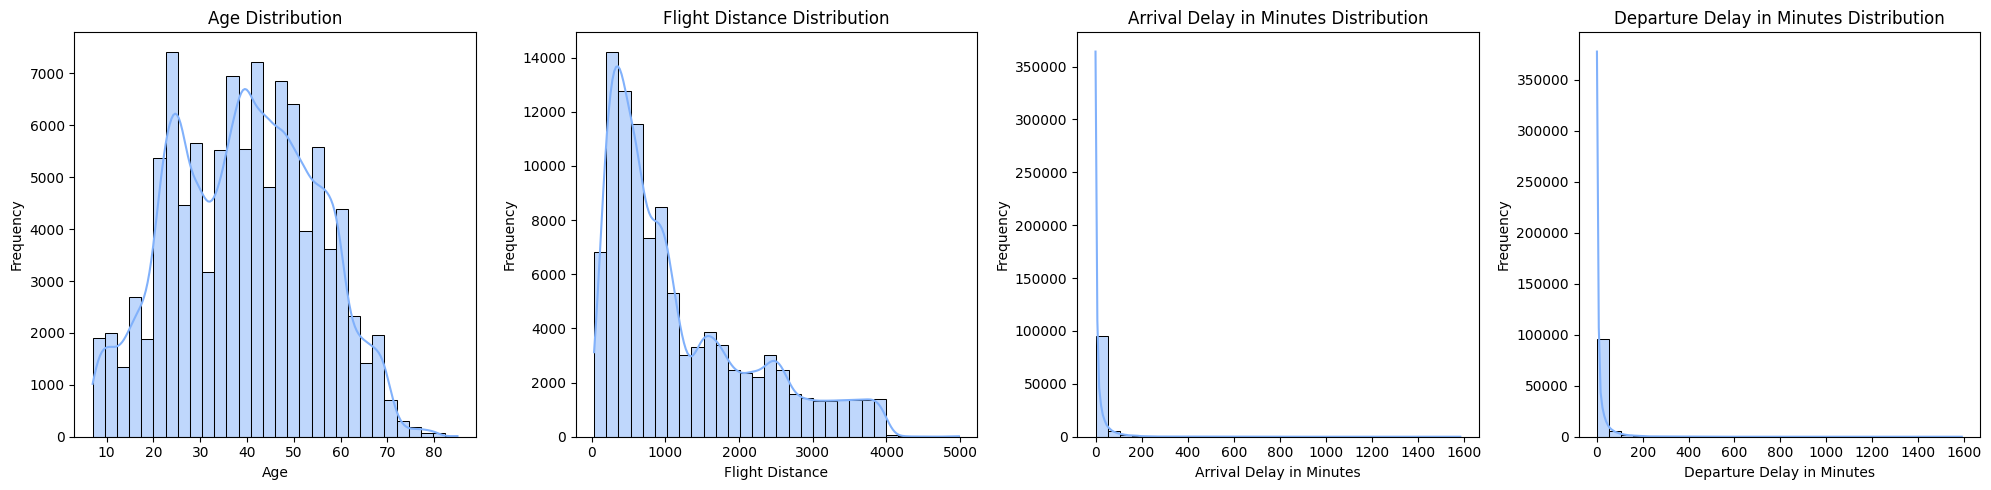

In [9]:
# Histograms for numerical variables in training data
plt.figure(figsize=(20, 5))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(1, 4, i)
    sns.histplot(cleaned_train_data[col], bins=30, kde=True, color='#81b1fb')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [10]:
# percent of 0 arrival and departure delay
columns_of_interest = ["Departure Delay in Minutes", "Arrival Delay in Minutes"]
for x in columns_of_interest:
    # Counupper_boundt the number of rows with 0 values in column 'x'
    num_zero_values = (cleaned_train_data[x] == 0).sum()

    # Calculate the total number of rows in the DataFrame
    total_rows = len(cleaned_train_data)

    # Calculate the proportion of rows with 0 values in column 'x' to the total number of rows
    proportion_zero_values = num_zero_values / total_rows

    # Print the proportion
    print(f"Proportion of rows with 0 values in column '{x}' to total rows:", proportion_zero_values)

Proportion of rows with 0 values in column 'Departure Delay in Minutes' to total rows: 0.5646365876193409
Proportion of rows with 0 values in column 'Arrival Delay in Minutes' to total rows: 0.5597378349245458


In [11]:
'''
Insights:
- There is an equal number of male and female participants in the survey.
- Most of passengers are neutral or dissatisfied = 56.7% ==> we need to analysis the reasons and try to find business solutions to make them more satisfied
- We have more loyal customer data (81.7%)
- Most of travels are for Business travel (69%)
- Very few people fly in the economy plus class. They usually prefer Economy or Business.

- The most frequent age that travel is in range[38,42] and [23,28]
- The variables Flight Distance and Departure Delay and Arrival Delay are all heavily right-skewed
- Most of the delays are 0, which is a good indicator
'''

'\nInsights:\n- There is an equal number of male and female participants in the survey.\n- Most of passengers are neutral or dissatisfied = 56.7% ==> we need to analysis the reasons and try to find business solutions to make them more satisfied\n- We have more loyal customer data (81.7%)\n- Most of travels are for Business travel (69%)\n- Very few people fly in the economy plus class. They usually prefer Economy or Business.\n\n- The most frequent age that travel is in range[38,42] and [23,28]\n- The variables Flight Distance and Departure Delay and Arrival Delay are all heavily right-skewed\n- Most of the delays are 0, which is a good indicator\n'

In [12]:
# Select numerical columns
columns_of_interest = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance" ]

# Calculate quartiles for numerical columns
Q1 = cleaned_train_data[columns_of_interest].quantile(0.25)
Q3 = cleaned_train_data[columns_of_interest].quantile(0.75)

# Calculate IQR for numerical columns
IQR = Q3 - Q1

# Calculate lower and upper bounds for numerical columns
lower_bound_continuous_variables = Q1 - 1.5 * IQR
upper_bound_continuous_variables = Q3 + 1.5 * IQR

# Detect outliers for numerical columns
outliers = (cleaned_train_data[columns_of_interest] < lower_bound_continuous_variables) | (cleaned_train_data[columns_of_interest] > upper_bound_continuous_variables)

# Count outliers in each numerical column
outliers_count = outliers.sum()
total_rows = cleaned_train_data[columns_of_interest].count()
outliers_portion = outliers_count / total_rows

print("Number of outliers in each column:")
print(outliers_count)

print("Portion of outliers in each column:")
print(outliers_portion)


Number of outliers in each column:
Departure Delay in Minutes    14529
Arrival Delay in Minutes      13954
Flight Distance                2291
dtype: int64
Portion of outliers in each column:
Departure Delay in Minutes    0.139831
Arrival Delay in Minutes      0.134699
Flight Distance               0.022049
dtype: float64


**Solve problem of Outliers In training data**

In [13]:
'''
Since the portion of rows having the outliers in the "Flight Distance" is very small so we will remove it
'''
# Calculate quartiles, IQR, and bounds for column 'x'
Q1 = cleaned_train_data['Flight Distance'].quantile(0.25)
Q3 = cleaned_train_data['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_FD = Q1 - 1.5 * IQR
upper_bound_FD = Q3 + 1.5 * IQR
# Identify outliers in column 'Flight Distance'
outliers = (cleaned_train_data['Flight Distance'] < lower_bound_FD) | (cleaned_train_data['Flight Distance'] > upper_bound_FD)

# Remove rows with outliers in column 'x' from the DataFrame
cleaned_train_data = cleaned_train_data[~outliers]
num_rows = cleaned_train_data.shape[0]
print("Number of rows after removing the outliers", num_rows)

Number of rows after removing the outliers 101613


In [14]:
# we will normalize "Departure Delay in Minutes","Arrival Delay in Minutes"
right_skewed = ["Departure Delay in Minutes","Arrival Delay in Minutes"]
# Normalize the numeric variables 
for x in right_skewed:
    cleaned_train_data[x] = np.log(cleaned_train_data[x] + 1)

/tmp/ipykernel_10149/3324669675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_train_data[x] = np.log(cleaned_train_data[x] + 1)


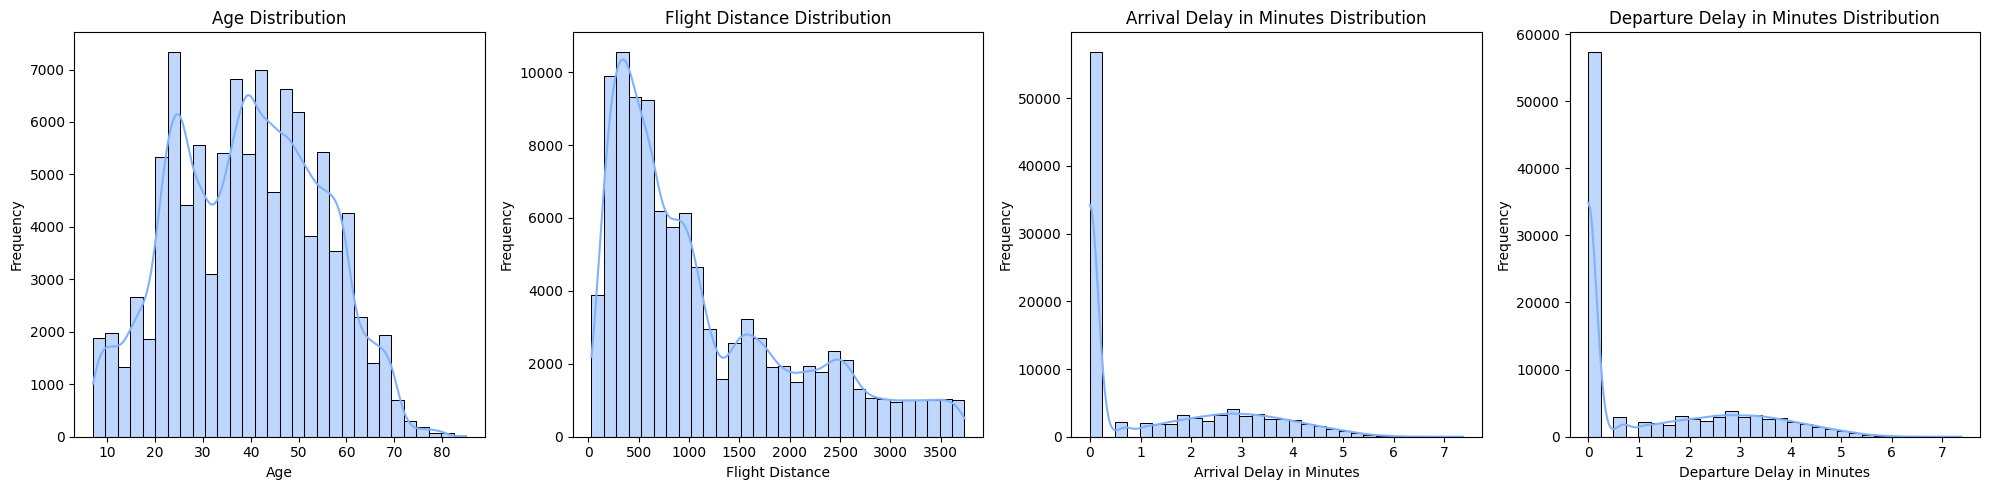

In [15]:
# Histograms for numerical variables
plt.figure(figsize=(20, 5))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(1, 4, i)
    sns.histplot(cleaned_train_data[col], bins=30, kde=True, color='#81b1fb')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [16]:
'''
- The variables Departure Delay and Arrival Delay are still heavily right-skewed which is expected as most of the values are 0
'''

'\n- The variables Departure Delay and Arrival Delay are still heavily right-skewed which is expected as most of the values are 0\n'

**Visualizing continuous variables in Test Data**

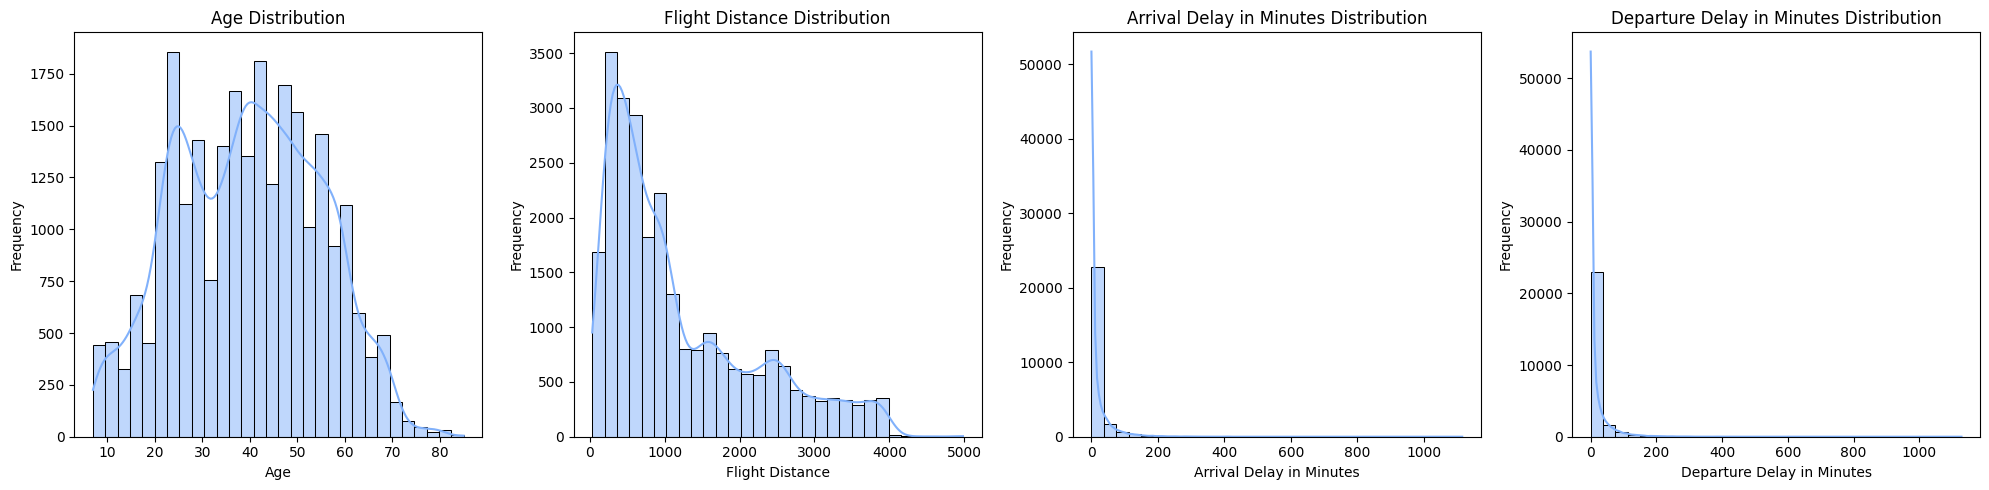

In [17]:
# Histograms for numerical variables in test data
plt.figure(figsize=(20, 5))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(1, 4, i)
    sns.histplot(cleaned_test_data[col], bins=30, kde=True, color='#81b1fb')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [18]:
# Select numerical columns
columns_of_interest = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance" ]

# Calculate quartiles for numerical columns
Q1 = cleaned_test_data[columns_of_interest].quantile(0.25)
Q3 = cleaned_test_data[columns_of_interest].quantile(0.75)

# Calculatecleaned_data_no_outliers IQR for numerical columns
IQR = Q3 - Q1

# Calculate lower and upper bounds for numerical columns
lower_bound_continuous_variables_test = Q1 - 1.5 * IQR
upper_bound_continuous_variables_test = Q3 + 1.5 * IQR

# Detect outliers for numerical columns
outliers = (cleaned_test_data[columns_of_interest] < lower_bound_continuous_variables_test) | (cleaned_test_data[columns_of_interest] > upper_bound_continuous_variables_test)

# Count outliers in each numerical column
outliers_count = outliers.sum()
total_rows = cleaned_test_data[columns_of_interest].count()
outliers_portion = outliers_count / total_rows

print("Number of outliers in each column:")
print(outliers_count)

print("Portion of outliers in each column:")
print(outliers_portion)


Number of outliers in each column:
Departure Delay in Minutes    3542
Arrival Delay in Minutes      3538
Flight Distance                580
dtype: int64
Portion of outliers in each column:
Departure Delay in Minutes    0.136794
Arrival Delay in Minutes      0.136639
Flight Distance               0.022400
dtype: float64


**Solve problem of Outliers In test data**

In [19]:
'''
Since the portion of rows having the outliers in the "Flight Distance" is very small so we will remove it
'''
# Calculate quartiles, IQR, and bounds for column 'x'
Q1 = cleaned_test_data['Flight Distance'].quantile(0.25)
Q3 = cleaned_test_data['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_FD = Q1 - 1.5 * IQR
upper_bound_FD = Q3 + 1.5 * IQR
# Identify outliers in column 'Flight Distance'
outliers = (cleaned_test_data['Flight Distance'] < lower_bound_FD) | (cleaned_test_data['Flight Distance'] > upper_bound_FD)

# Remove rows with outliers in column 'x' from the DataFrame
cleaned_test_data = cleaned_test_data[~outliers]
num_rows = cleaned_test_data.shape[0]
print("Number of rows after removing the outliers", num_rows)

Number of rows after removing the outliers 25313


In [20]:
# we will normalize "Departure Delay in Minutes","Arrival Delay in Minutes"
right_skewed = ["Departure Delay in Minutes","Arrival Delay in Minutes"]
# Normalize the numeric variables 
for x in right_skewed:
    cleaned_test_data[x] = np.log(cleaned_test_data[x] + 1)

/tmp/ipykernel_10149/576724886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_test_data[x] = np.log(cleaned_test_data[x] + 1)


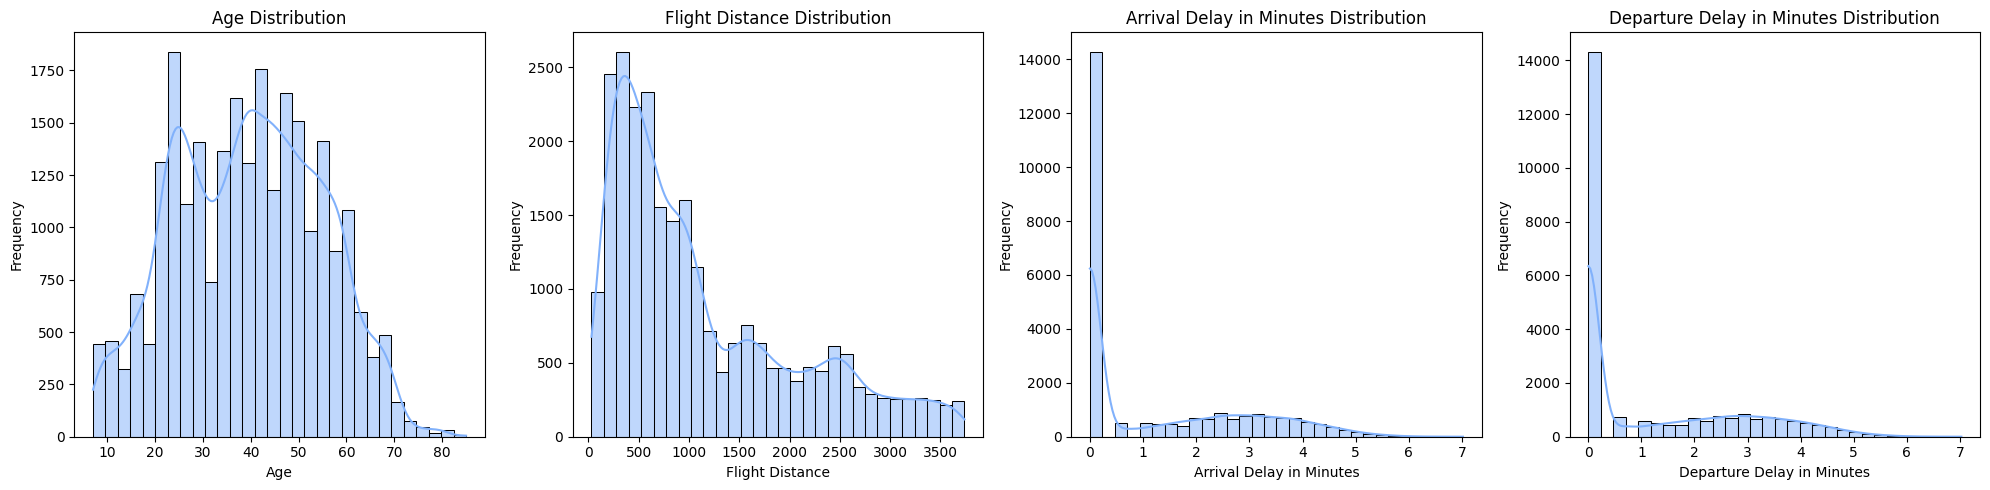

In [21]:
# Histograms for numerical variables
plt.figure(figsize=(20, 5))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(1, 4, i)
    sns.histplot(cleaned_test_data[col], bins=30, kde=True, color='#81b1fb')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Bivariate Analysis**

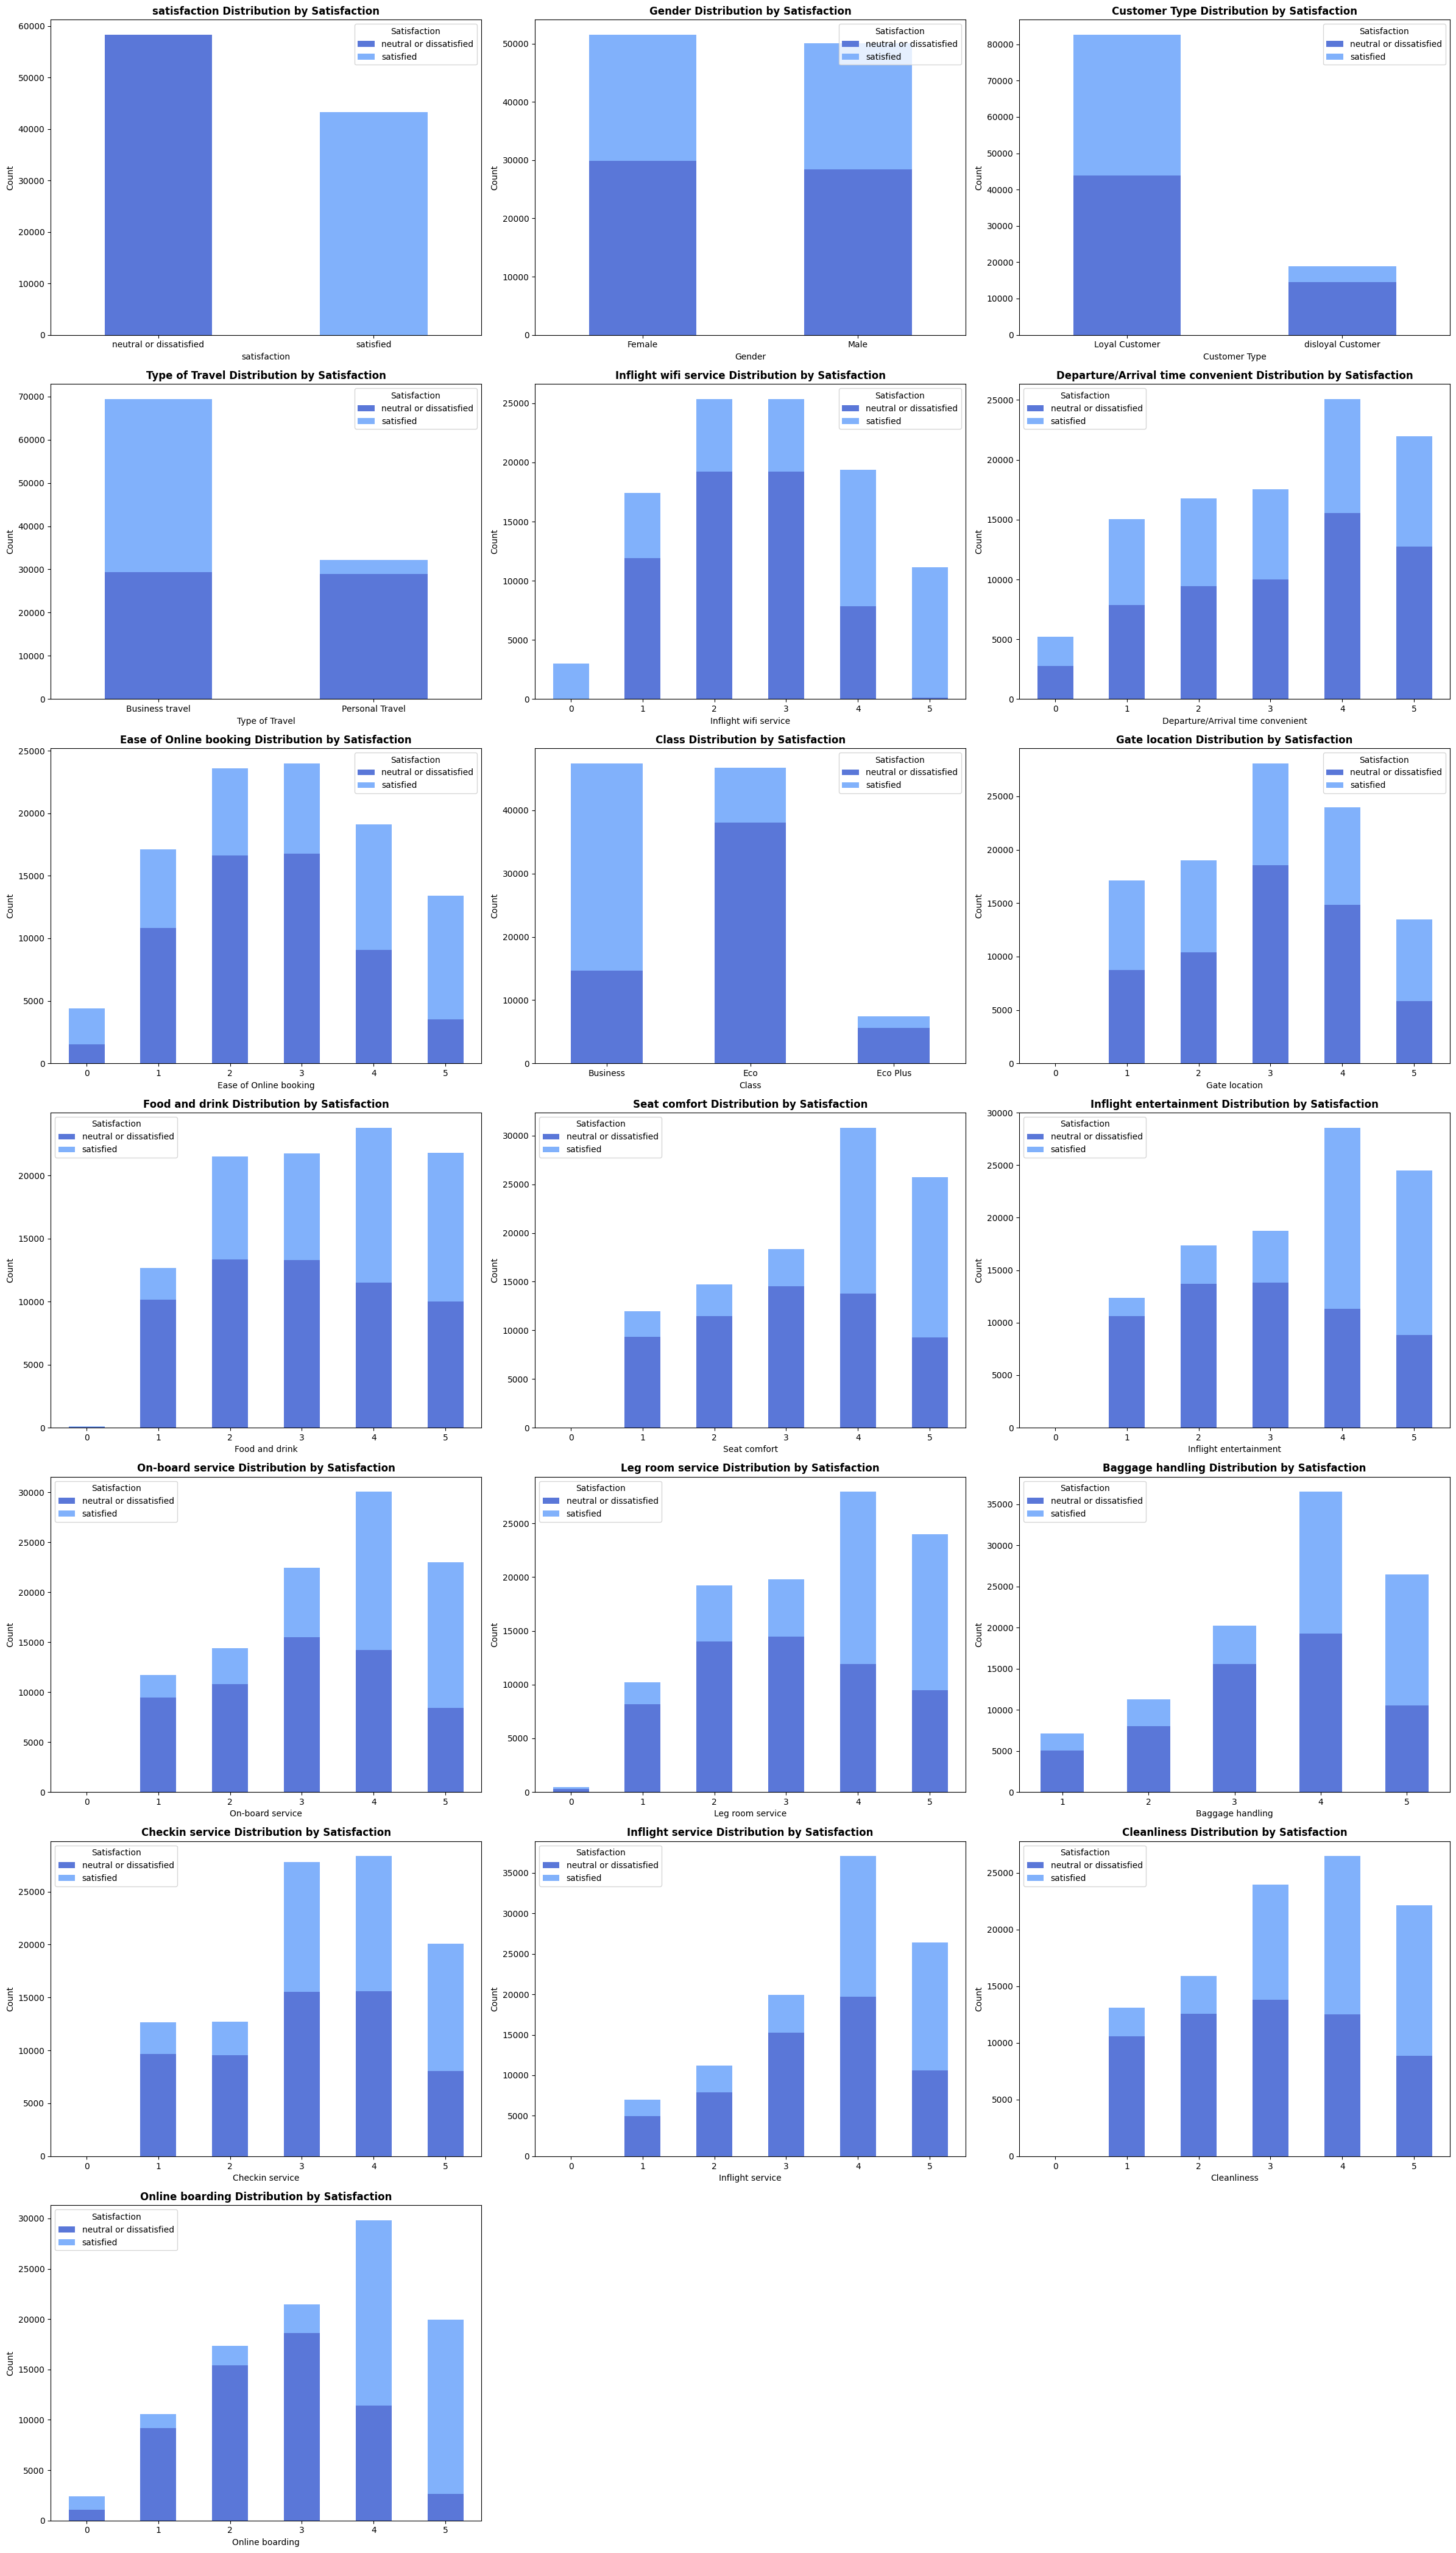

In [22]:
num_plots = len(categorical_variables)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

plt.figure(figsize=(24, 6 * num_rows))  # Adjusting the figure size based on the number of rows

for i, col in enumerate(categorical_variables, 1):
    plt.subplot(num_rows, num_cols, i)
    satisfaction_counts = cleaned_train_data.groupby([col, 'satisfaction']).size().unstack()
    satisfaction_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#5a77d8', '#81b1fb'])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Distribution by Satisfaction', fontweight='bold')  # Set font weight to bold
    plt.legend(title='Satisfaction')
    plt.xticks(rotation=0)  # Set x-axis tick labels rotation to 0 degrees (horizontal)

plt.tight_layout()
plt.show()

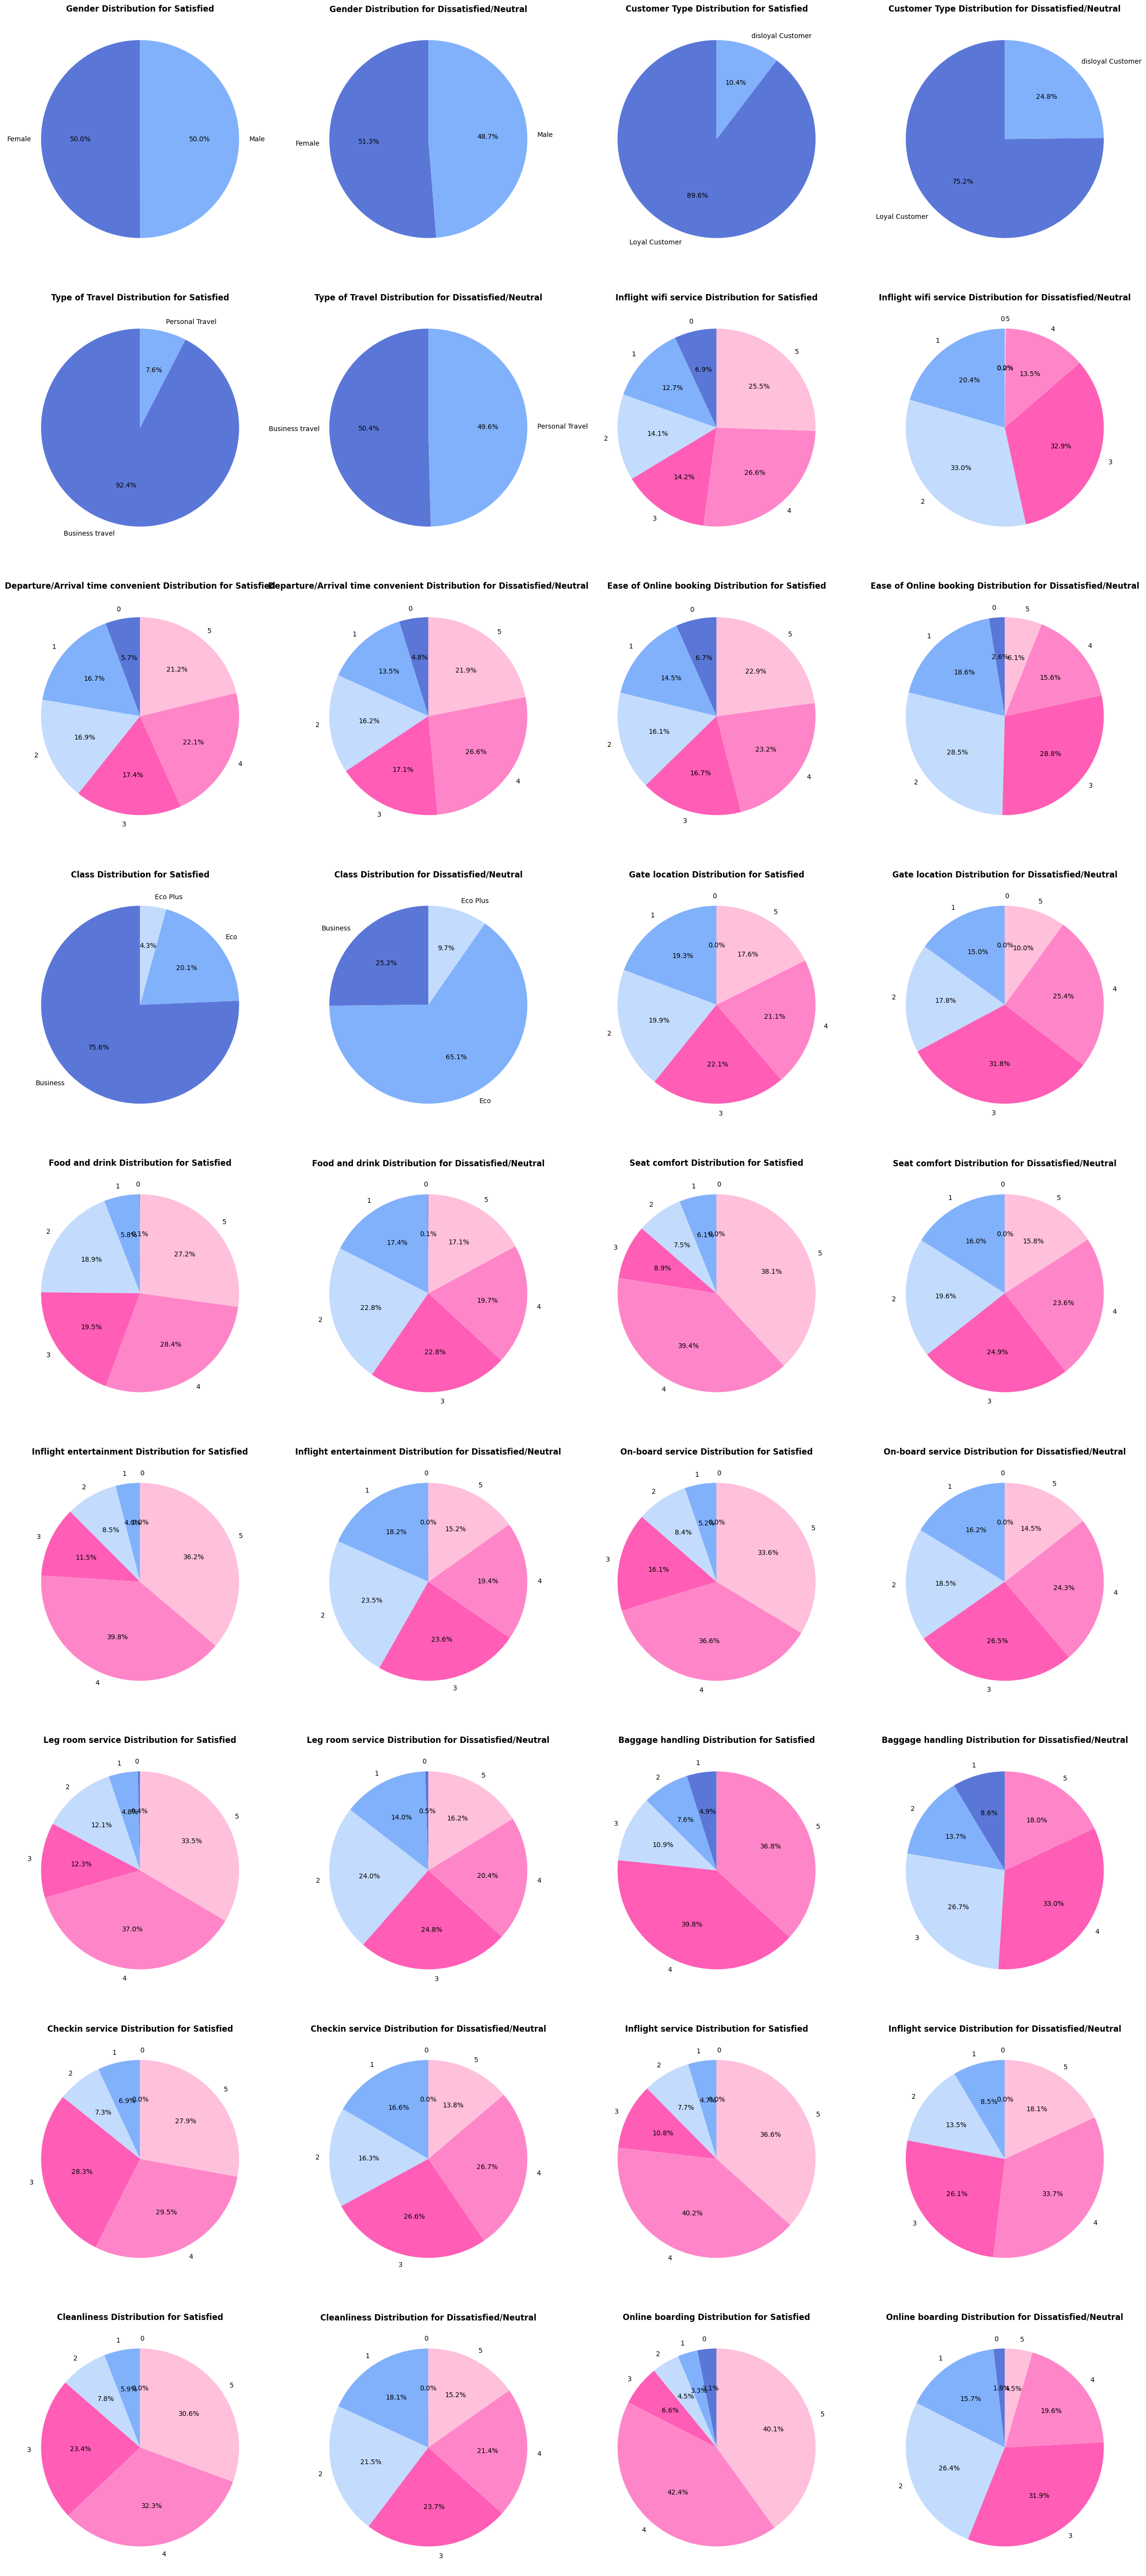

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of plots and the number of rows required
num_plots = len(categorical_variables)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

# Adjust the figure size based on the number of rows
plt.figure(figsize=(24, 6 * num_rows))

# Iterate over each categorical column
for i, col in enumerate(categorical_variables[1:], 1):
    # Create subplots for each categorical column
    plt.subplot(num_rows, num_cols * 2, i * 2 - 1)  # Adjust subplot index for 'satisfied' pie chart
    plt.subplot(num_rows, num_cols * 2, i * 2)  # Adjust subplot index for 'dissatisfied/neutral' pie chart
    
    # Group data by the categorical column and 'satisfaction', then count occurrences and unstack
    satisfaction_counts = cleaned_train_data.groupby([col, 'satisfaction']).size().unstack()
    
    # Replace NaN values with 0
    satisfaction_counts = satisfaction_counts.fillna(0)
    
    # Plot pie charts for 'satisfied' and 'dissatisfied/neutral'
    # Pie chart for 'satisfied'
    plt.subplot(num_rows, num_cols * 2, i * 2 - 1)
    plt.pie(satisfaction_counts['satisfied'], labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'{col} Distribution for Satisfied', fontweight='bold')
    
    # Pie chart for 'dissatisfied/neutral'
    plt.subplot(num_rows, num_cols * 2, i * 2)
    plt.pie(satisfaction_counts['neutral or dissatisfied'], labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'{col} Distribution for Dissatisfied/Neutral', fontweight='bold')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

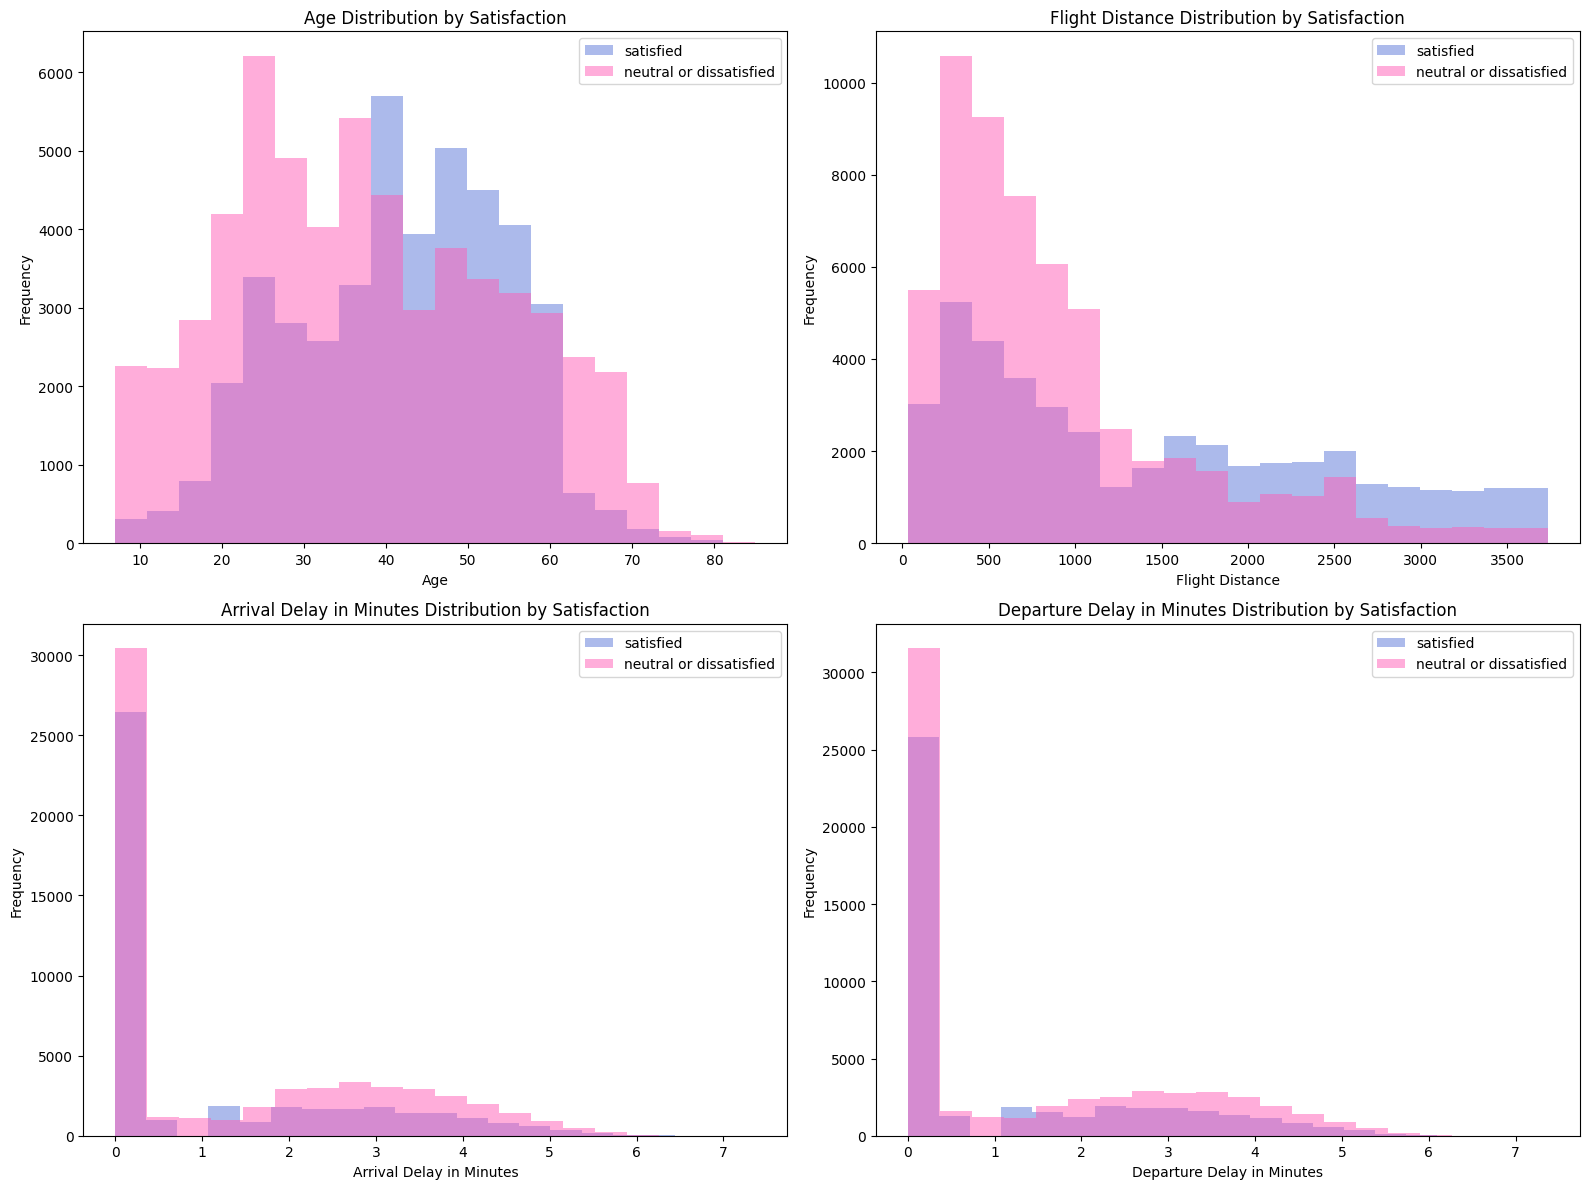

In [24]:
# Continuous histograms for numerical columns showing distribution of satisfaction
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(2, 2, i)
    plt.hist(cleaned_train_data[cleaned_train_data['satisfaction'] == 'satisfied'][col], bins=20, alpha=0.5, color='#5a77d8', label='satisfied')
    plt.hist(cleaned_train_data[cleaned_train_data['satisfaction'] == 'neutral or dissatisfied'][col], bins=20, alpha=0.5, color='#ff5db6', label='neutral or dissatisfied')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{col} Distribution by Satisfaction')

plt.tight_layout()
plt.show()

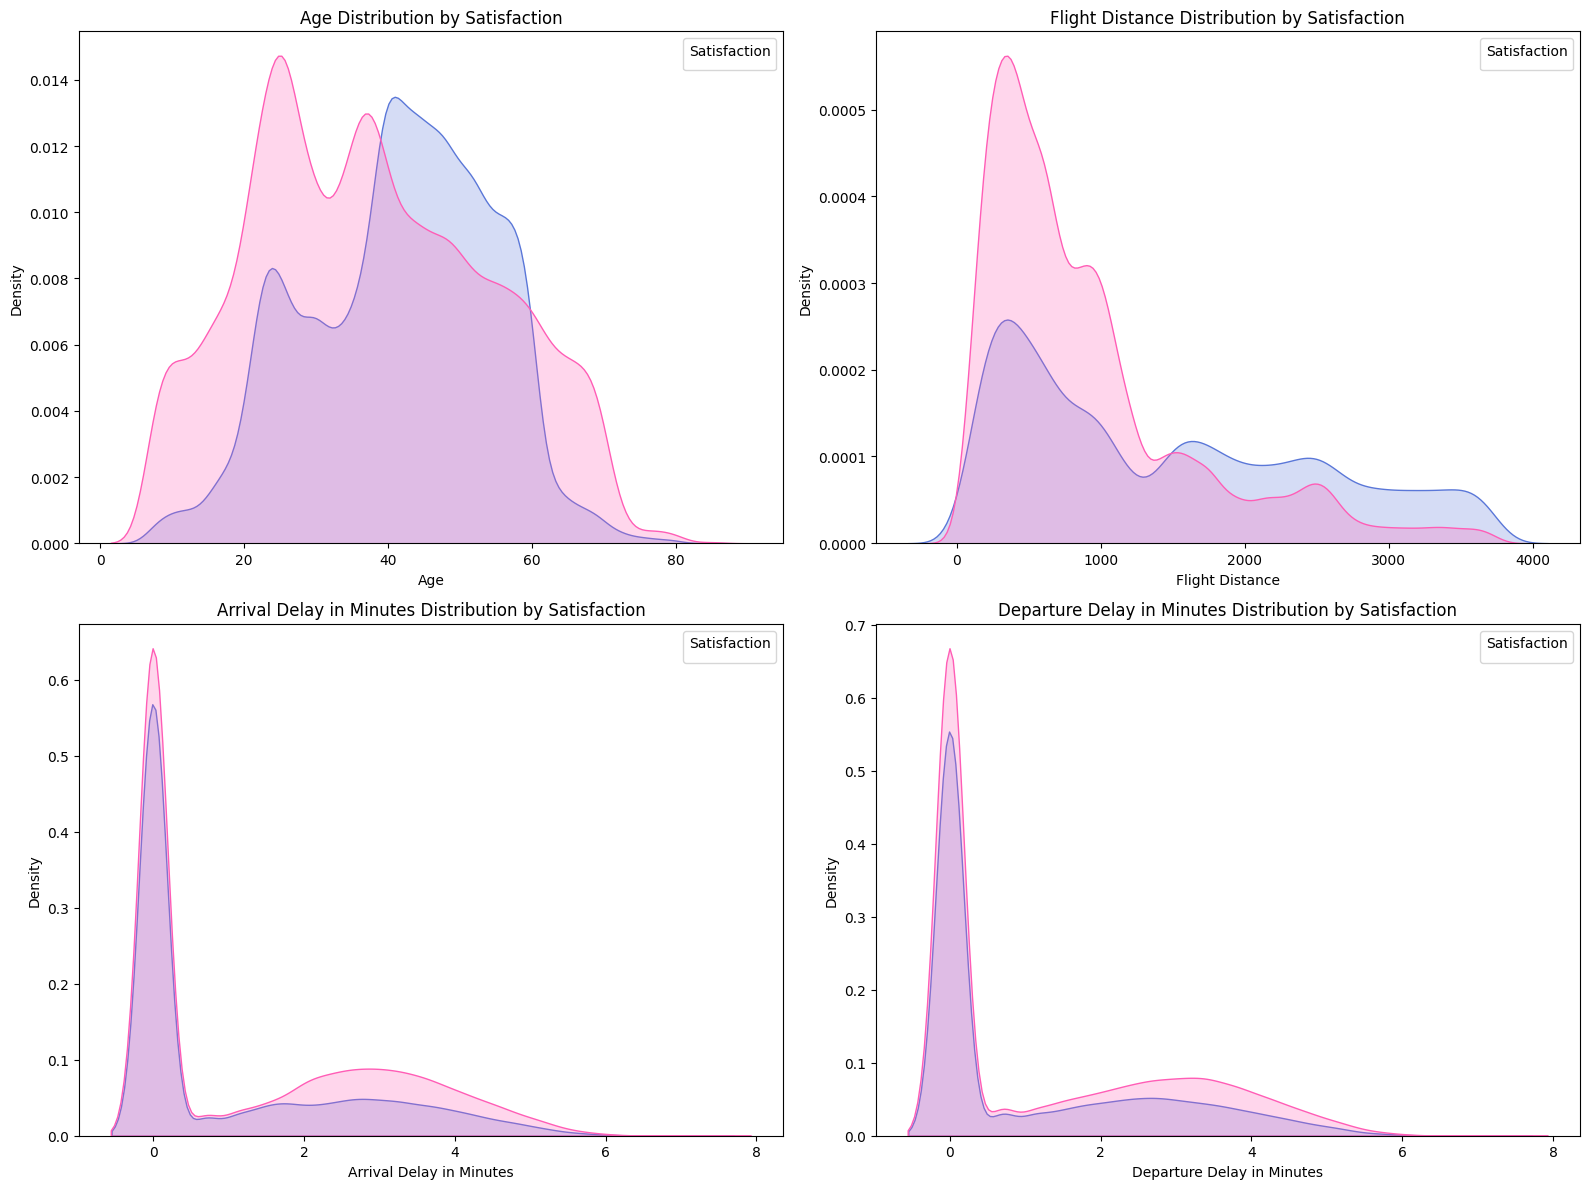

In [25]:
# Continuous histograms for numerical columns showing distribution of satisfaction
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(2, 2, i)
    g = sns.kdeplot(data=cleaned_train_data, x=col, hue='satisfaction', fill=True, palette=['#ff5db6', '#5a77d8'])

    # Extract KDE line objects for legend entries
    handles, labels = g.get_legend_handles_labels()

    # Manually create legend with custom labels
    plt.legend(handles, ['Satisfied', 'Neutral or Dissatisfied'], title='Satisfaction', loc='upper right')

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'{col} Distribution by Satisfaction')

plt.tight_layout()
plt.show()


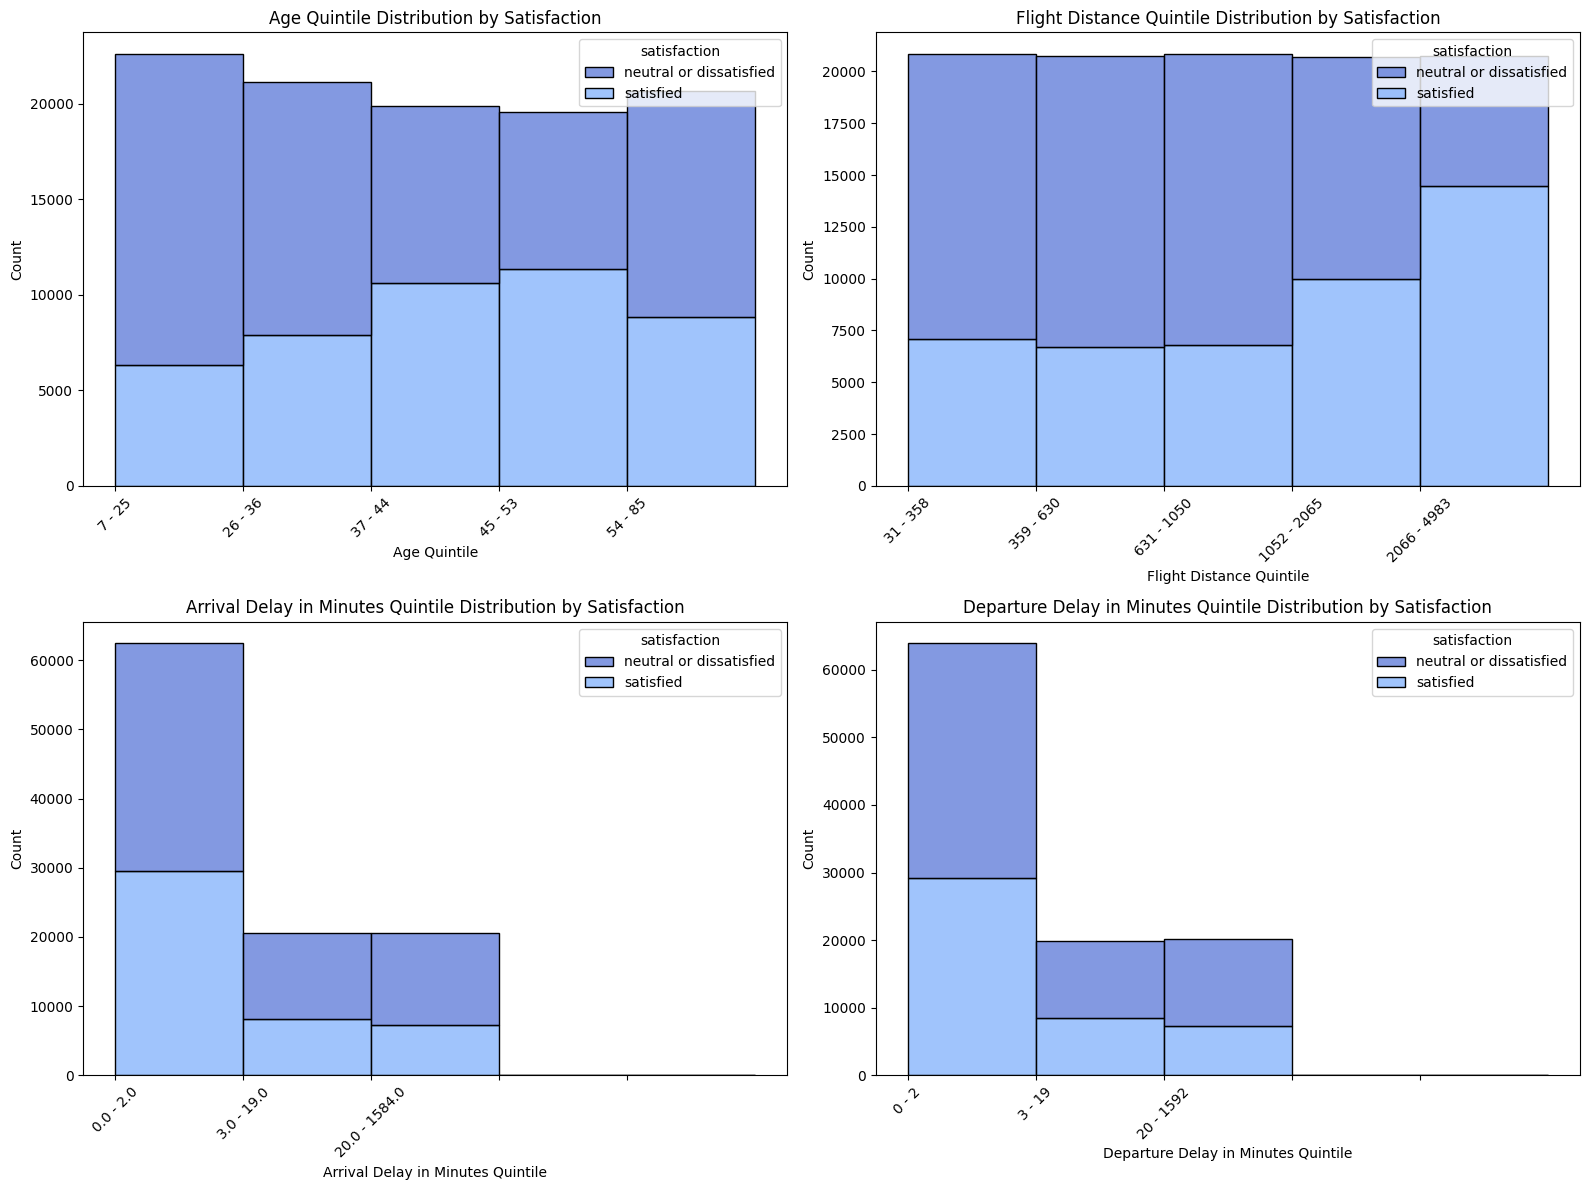

In [26]:
# apply this grouping on the original data before normalization to get the original values of the age and delay
cleaned_train_data = pd.read_csv(os.path.join(current_dir, relative_path_train))

# Calculate the quintiles for each continuous variable
for col in continuous_variables:
    cleaned_train_data[f'{col}_quintile'] = pd.qcut(cleaned_train_data[col], q=5, labels=False, duplicates='drop')

# Define the range titles for each quintile group
range_titles = []

for col in continuous_variables:
    quintile_ranges = []
    quintile_series = cleaned_train_data.groupby(f'{col}_quintile')[col].apply(lambda x: f'{x.min()} - {x.max()}')
    for quintile in range(5):
        if quintile in quintile_series.index:
            quintile_range = quintile_series.loc[quintile]
        else:
            quintile_range = ''  # Handle the case where the quintile does not exist
        quintile_ranges.append(quintile_range)
    range_titles.append(quintile_ranges)

# Continuous histograms for numerical columns showing distribution of satisfaction
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=cleaned_train_data, x=f'{col}_quintile', hue='satisfaction', multiple='stack', palette=['#5a77d8', '#81b1fb'], bins=range(6))
    plt.xlabel(f'{col} Quintile')
    plt.ylabel('Count')
    plt.title(f'{col} Quintile Distribution by Satisfaction')
    
    # Set custom labels for x-axis ticks representing the range titles
    plt.xticks(range(5), range_titles[i-1], rotation=45)

plt.tight_layout()
plt.show()


In [28]:
'''
Insights:
  - Gender nearly doesn't affect satisfaction
  
  - Loyal passengers have higher satisfaction percentages than Disloyal ones

  - Satisfied Passengers usually go for Business travel.
  - Most people of Passengers going for Personal TRavel are not satisfied

  - Satisfied Passengers use Business Class while travelling.
  - Passengers using Eco travelling are the less Satisfied Passengers
  - More than 80% of passengers flying in economy are either Neutral or Dissatisfied. That shows us that it needs some impromevent.

  - Most Satisfied Passengers are in range [37-53] year & Most Unsatisfied are in range [7-36] year.
  
  - Satisfied Passengers have more long-distance flight than the dissatisfied.

  - The more the delay the less the satisfied passengers portion
  
  - The most frequency in the levels of satisfaction is 4 for all except: [Inflight wifi service, Ease of Online booking, Gate location] is 3 
  
  - Rate 3 is the most frequenent between unsatisfied passengers in services
  - Rate 4 is the most frequenent between satisfied passengers in services
  - The ratings are almost evenly distributed between 1 and 5.
          With that in mind, the positive thing is that there are more positive or neutral ratings (3 through 5)
          than negative ones (0 through 2).

  - Our passengers have mixed opinions about the Departure and Arrival Time Convenience.
          We come to the conclusion that there is not that much correlation between total Satisfaction
          and Departure and Arrival Time Convenience. 
'''

"\nInsights:\n  - Gender nearly doesn't affect satisfaction\n  \n  - Loyal passengers have higher satisfaction percentages than Disloyal ones\n\n  - Satisfied Passengers usually go for Business travel.\n  - Most people of Passengers going for Personal TRavel are not satisfied\n\n  - Satisfied Passengers use Business Class while travelling.\n  - Passengers using Eco travelling are the less Satisfied Passengers\n  - More than 80% of passengers flying in economy are either Neutral or Dissatisfied. That shows us that it needs some impromevent.\n\n  - Most Satisfied Passengers are in range [37-53] year & Most Unsatisfied are in range [7-36] year.\n  \n  - Satisfied Passengers have more long-distance flight than the dissatisfied.\n\n  - The more the delay the less the satisfied passengers portion\n  \n  - The most frequency in the levels of satisfaction is 4 for all except: [Inflight wifi service, Ease of Online booking, Gate location] is 3 \n  \n  - Rate 3 is the most frequenent between uns

**Showing Correlation between satisfaction and other columns**

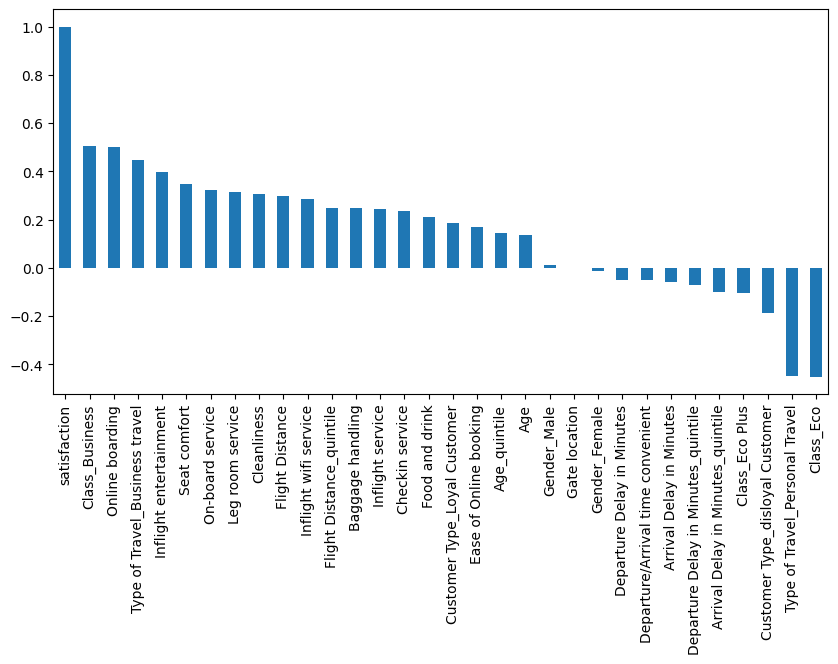

In [29]:
plt.figure(figsize=(10, 5))

cleaned_train_data_copy = cleaned_train_data.copy()
# Replace satisfaction categories with numerical values
cleaned_train_data_copy["satisfaction"].replace({"satisfied": 1, "neutral or dissatisfied": 0}, inplace=True)

# One-hot encode non-numeric columns
df_dummies = pd.get_dummies(cleaned_train_data_copy)

# Calculate correlation and plot
df_dummies.corr()['satisfaction'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [30]:
'''
Positively Correlated:
  - Business Class ,online boarding, inflight entertainment, seat comfort,
    on-board service, Legroom service, cleanliness, Flight distance,
    and Business travels are strong reasons for people satisfaction.

Negatively Correlated:
  - Personal Travels, Economy Class, Eco plus Class or being Disloyal Customer results in Unsatisfaction.
'''

'\nPositively Correlated:\n  - Business Class ,online boarding, inflight entertainment, seat comfort,\n    on-board service, Legroom service, cleanliness, Flight distance,\n    and Business travels are strong reasons for people satisfaction.\n\nNegatively Correlated:\n  - Personal Travels, Economy Class, Eco plus Class or being Disloyal Customer results in Unsatisfaction.\n'

**Multivariate Analysis**

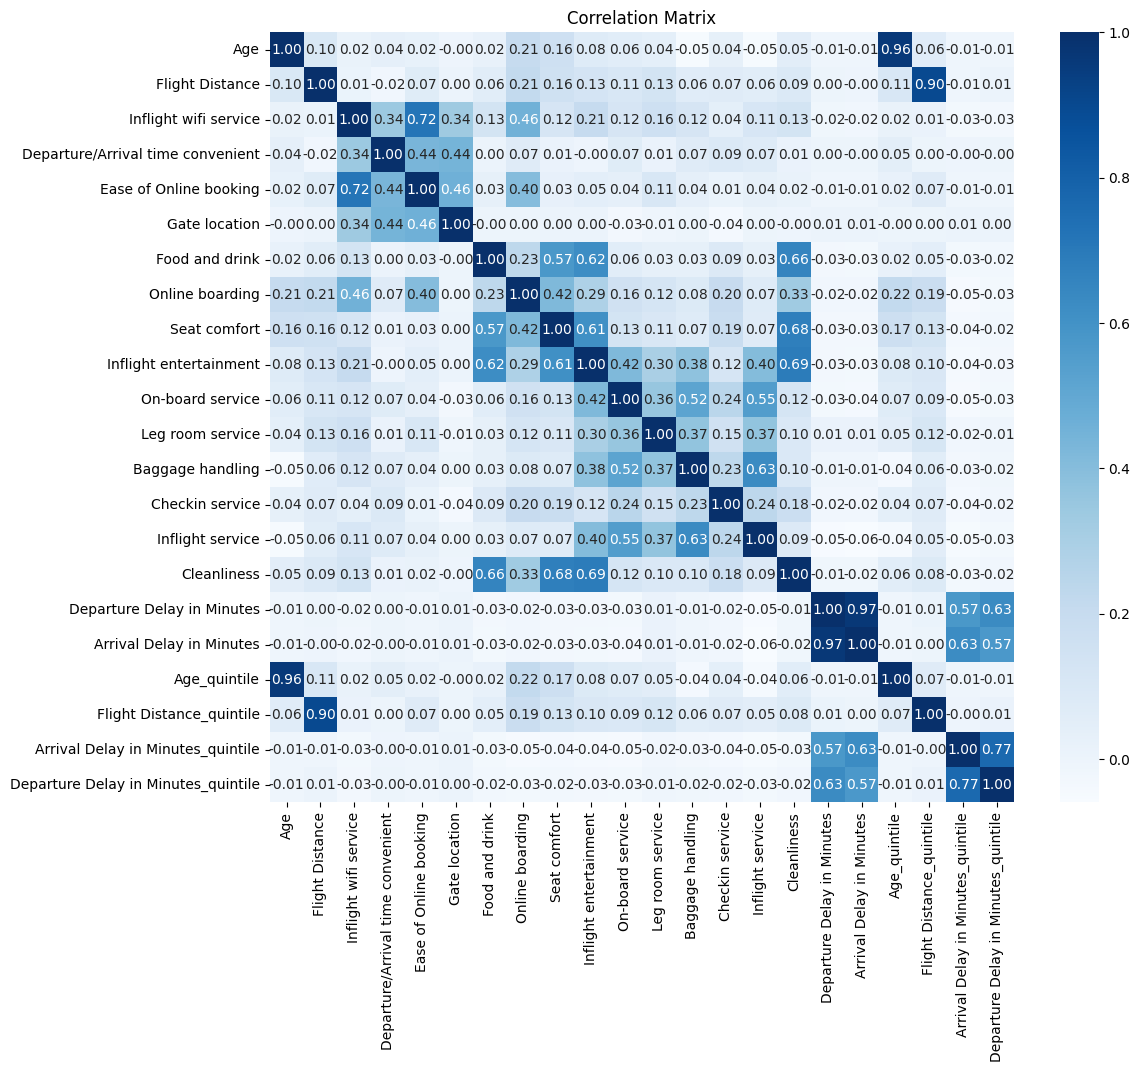

In [31]:
# Drop non-numeric columns & non-categorical columns
numeric_data = cleaned_train_data.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
# Set font size for y-axis tick labels
heatmap.yaxis.set_tick_params(labelsize=10)
plt.title('Correlation Matrix')
plt.show()


In [32]:
'''
Insights:
- Departure Delay is highly correlated with Arrival Delay. [Will deal with this in feature engineering]
- Inflight WiFi service and Ease of online booking are + correlated.
- Inflight entertainment, Food and Drink , Seat comfort and cleanliness are + correlated .
- Baggage handling is + correlated with Inflight service
'''

'\nInsights:\n- Departure Delay is highly correlated with Arrival Delay. [Will deal with this in feature engineering]\n- Inflight WiFi service and Ease of online booking are + correlated.\n- Inflight entertainment, Food and Drink , Seat comfort and cleanliness are + correlated .\n- Baggage handling is + correlated with Inflight service\n'

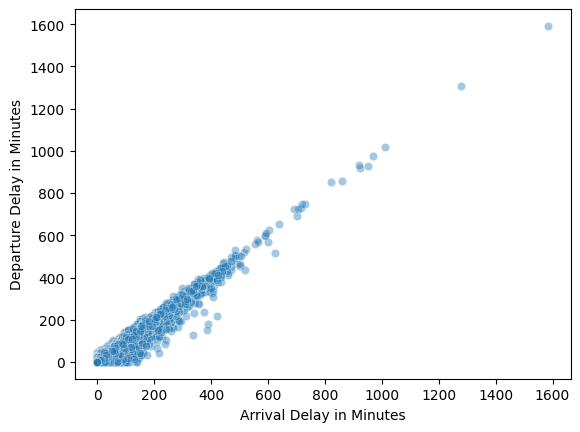

In [33]:
sns.scatterplot(x ='Arrival Delay in Minutes' , y = 'Departure Delay in Minutes' , data = cleaned_train_data,alpha=0.4)
plt.show()

In [34]:
'''
- There is a strong correlation between the two columns
  we can drop one of the two columns and as Arrival Delay in Minutes column has some null , we can drop it.

- We can also see the outliers here. 
'''

'\n- There is a strong correlation between the two columns\n  we can drop one of the two columns and as Arrival Delay in Minutes column has some null , we can drop it.\n\n- We can also see the outliers here. \n'

**Drop Arrival delay in minutes column**

In [35]:
preprocessed_train_data = cleaned_train_data.drop(columns=["Arrival Delay in Minutes"])
preprocessed_test_data = cleaned_test_data.drop(columns=["Arrival Delay in Minutes"])

In [36]:
preprocessed_train_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction',
       'Age_quintile', 'Flight Distance_quintile',
       'Arrival Delay in Minutes_quintile',
       'Departure Delay in Minutes_quintile'],
      dtype='object')

In [37]:
preprocessed_test_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,3.931826,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0.000000,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0.000000,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0.000000,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0.000000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0.000000,neutral or dissatisfied
25889,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0.000000,satisfied
25890,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0.000000,neutral or dissatisfied
25891,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0.000000,satisfied


**Remove quintile columns**

In [38]:
preprocessed_train_data = preprocessed_train_data.drop(columns=['Age_quintile', 'Flight Distance_quintile',
       'Arrival Delay in Minutes_quintile',
       'Departure Delay in Minutes_quintile'])

In [39]:
preprocessed_train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,neutral or dissatisfied


**Write the train and test data to CSV files**


In [40]:
relative_path = os.path.join('..', 'data', 'train_data_after_EDA.csv')
preprocessed_train_data.to_csv(os.path.join(current_dir, relative_path), index=False) # exclude the DataFrame index from being saved to the CSV file.

In [41]:
relative_path = os.path.join('..', 'data', 'test_data_after_EDA.csv')
preprocessed_test_data.to_csv(os.path.join(current_dir, relative_path), index=False) # exclude the DataFrame index from being saved to the CSV file.